EEG data from Kaggle by Hoahan Wang was obtained from 10 college students while they watched MOOC video clips to determine whether they were confused or not. This is a binary classification problem, where  the output is a one or a zero. The inputs were the gamma, theta, alpha, beta, etc. 

In [91]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('EEG_data.csv')

In [92]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


Given brain data, predict whether students are confused are not...
Look out for balance between zero and one in classification problems, because if you have too many zeros then the alogorithm has not a good chance to learn what is a one.
Below checks this out.
12,000 rows split pretty evenly.

In [93]:
np.unique(df['user-definedlabeln'],return_counts=True)

(array([0., 1.]), array([6244, 6567]))

Plot to view data

(-10000, 100000)

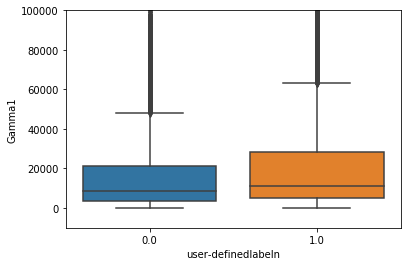

In [94]:
sns.boxplot(x='user-definedlabeln',y='Gamma1',data=df)
plt.ylim(-10000,100000)

(-50000, 2000000)

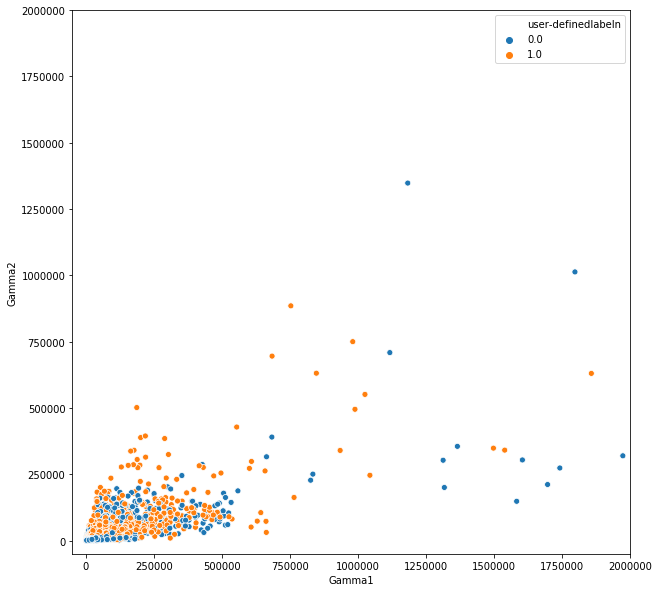

In [95]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Gamma1',y='Gamma2',hue='user-definedlabeln',data=df)
plt.xlim(-50000,2000000)
plt.ylim(-50000,2000000)

In [86]:
sel_feature = ['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
'predefinedlabel']

#df =drop.na
X = df[sel_feature].values
Y = df['user-definedlabeln'].values


(-50000, 2000000)

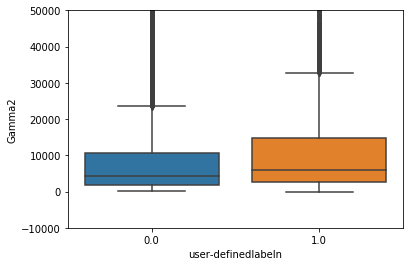

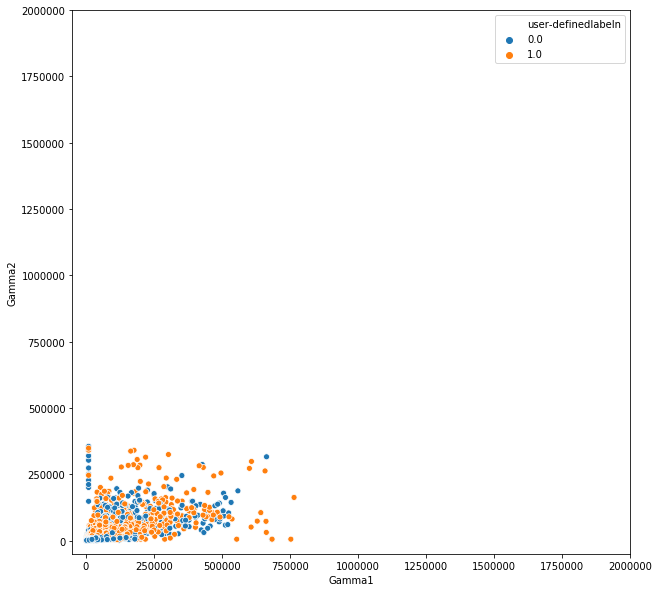

In [87]:
df['Gamma1'][df.Gamma1>10*np.std(df.Gamma1)] = np.median(df.Gamma1)
df['Gamma2'][df.Gamma2>10*np.std(df.Gamma2)] = np.median(df.Gamma2)
df['Alpha1'][df.Alpha1>10*np.std(df.Alpha1)] = np.median(df.Alpha1)
df['Alpha2'][df.Alpha2>10*np.std(df.Alpha2)] = np.median(df.Alpha2)
df['Beta1'][df.Beta1>10*np.std(df.Beta1)] = np.median(df.Beta1)
df['Beta2'][df.Beta2>10*np.std(df.Beta2)] = np.median(df.Beta2)

df['Raw'][df.Raw>10*np.std(df.Raw)] = np.median(df.Raw)
df['Delta'][df.Delta>10*np.std(df.Delta)] = np.median(df.Delta)
df['Theta'][df.Theta>10*np.std(df.Theta)] = np.median(df.Theta)

#Plot to show feature engineering worked on Gamma1 and Gamm2
sns.boxplot(x='user-definedlabeln', y='Gamma2', data=df)
plt.ylim(-10000,50000)
plt.figure(figsize=(10,10))
sns.scatterplot(x='Gamma1',y='Gamma2',hue='user-definedlabeln',data=df)
plt.xlim(-50000,2000000)
plt.ylim(-50000,2000000)


##Fit Neural Network and Logistic Regression to EEG data

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale

lr = LogisticRegression(solver='lbfgs')
nn = MLPClassifier(hidden_layer_sizes=(20,30,),early_stopping=True,max_iter=300)

df1 = df.dropna()

X =df1[['Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2',\
       'Gamma1','Gamma2']]
Y =df1[['user-definedlabeln']]

selected_features = [
    'SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
    'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
   'predefinedlabel'


#df = df.dropna
#X = df[selected_features].values
#Y = df['user-definedlabeln'].values



In [90]:
df1.shape,df.shape

((12811, 15), (12811, 15))

In [72]:
from sklearn.model_selection import cross_validate
import numpy as np

In [73]:
cv = cross_validate(lr,scale(X),np.ravel(Y),cv=5)
print("lr cv:", np.mean(cv['test_score']))

cv = cross_validate(nn,scale(X),np.ravel(Y),cv=5)
print("nn cv:", np.mean(cv['test_score']))

lr cv: 0.5867615252544542
nn cv: 0.5891046639516351


Feature engineering is necessary here as 58-59% accuracy is similar to if you simply flip a coin etc. 
